# Laboratory 2

## Mold and Fungicide

Aqui, nós queremos resolver a equação: 

\begin{equation}
    \begin{cases}
    \min_u \int_0^T (Ax(t)^2 + u(t)^2) dt \\
    s.a.~~ x'(t) = r(M - x(t)) - u(t)x(t), x(0) = x_0
    \end{cases}
\end{equation}

Para isso, utilizo meus cohecimentos até agora desenvolvidos. Noto que $f$ não é côncavo com relação a $u$, logo não posso afirmar nada sobre a existência a priori. 

$H(t,x,u,\lambda) := (Ax(t)^2 + u(t)^2) + \lambda(t)(r(M - x(t)) - u(t)x(t))$

$\frac{\partial H}{\partial u} = 0 \implies 2u(t) -\lambda(t)x(t) = 0 \implies u^*(t) = \frac{1}{2}\lambda(t)x(t) $

$\frac{\partial H}{\partial x} = 2Ax(t) - r\lambda(t) - u(t)\lambda(t) = - \lambda '(t) \implies \lambda '(t) = -2Ax(t) + r\lambda(t) + \frac{1}{2}\lambda(t)^2x(t) $ 

$\lambda(T) = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class mold():

    def __init__(self,A,r,M,x0,T):
        self.A = A
        self.r = r
        self.M = M
        self.x0 = x0
        self.T = T

    def us(self,t,adj,x):
        return 0.5*adj*x
  
    def dx(self,t,adj,x):
        return self.r*(self.M - x) - self.us(t,adj,x)*x

    def dadj(self,t,adj,x):
        return -2*self.A*x + self.r*adj + self.us(t,adj,x)*adj

    def runge_kutta_state(self,t,adj,x,N,h):

        for k in range(N):
            k1 = self.dx(t[k],adj[k],x[k])
            k2 = self.dx(t[k]+h/2,adj[k],x[k] + h*k1/2)
            k3 = self.dx(t[k]+h/2,adj[k],x[k]+h*k2/2)
            k4 = self.dx(t[k] + h, adj[k],x[k] + h*k3)
            x[k+1] = x[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return x

    def runge_kutta_adj(self,t,adj,x,N,h):
    
        for k in range(N,0,-1):
            k1 = self.dadj(t[k],adj[k],x[k])
            k2 = self.dadj(t[k] - h/2,adj[k] + h*k1/2,x[k])
            k3 = self.dadj(t[k] - h/2,adj[k]+h*k2/2,x[k])
            k4 = self.dadj(t[k] - h, adj[k] + h*k3,x[k])
            adj[k-1] = adj[k] - (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return adj

    def solve(self):
        #parameters
        N = 100
        h = 1/N
        delta = 0.1
        test = -1
        t = np.linspace(0,T,N + 1)
        #variables
        x = np.zeros(N + 1)
        adj = np.zeros(N + 1)
        u = np.zeros(N + 1)
        x[0] = self.x0

        while test < 0:

            old_u = u.copy()
            old_x = x.copy()
            old_adj = adj.copy()

            x = self.runge_kutta_state(t,old_adj,old_x,N,h)

            adj = self.runge_kutta_adj(t,old_adj,x,N,h)

            u = 0.5*(self.us(0,adj,x) + old_u)

            temp1 = delta*sum(abs(u)) - sum(abs(old_u - u))
            temp2 = delta*sum(abs(x)) - sum(abs(old_x - x))
            temp3 = delta*sum(abs(adj)) - sum(abs(old_adj - adj))
            test = min(temp1,temp2,temp3)

        return t,x,u,adj

In [42]:
def plotting(t,x):
    """ x is a dictionary with the name and a list with lists of the informations to plot"""
    fig = plt.figure(figsize=(12,10))
    for i in range(len(x.keys())):
        plt.subplot(3,1,i+1)
        for j in x[list(x.keys())[i]]:
            plt.plot(t,j)
        plt.title(list(x.keys())[i])

Parâmetros e modelagem

In [38]:
A,r,M,x0,T = 10,0.1,10,1,10

problem = mold(A,r,M,x0,T)
t,x,u,adj = problem.solve()

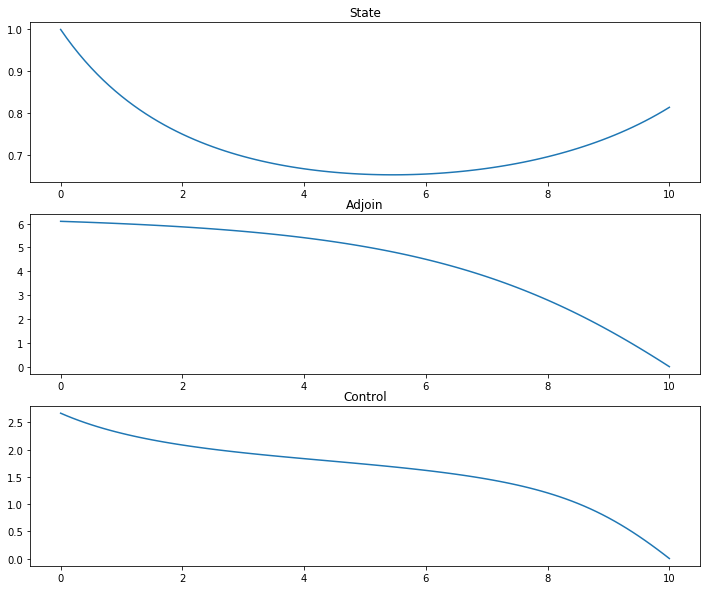

In [43]:
plotting(t,{'State': [x], 'Adjoin': [adj], 'Control':[u]})